<a href="https://colab.research.google.com/github/Owlmanandy/ATMS-421-Projects/blob/master/Sima_Final_Exam_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Question 21:
def lotka(x,y,alpha,beta,gamma,delta,t):
  dx = alpha*x - beta*x*y
  dy = delta*x*y - gamma*y
  results = np.array([dx, dy])
  return results

#Or, I used this later for the actual math in question 24 and 25:
def lotka(t, z):
  x, y = z
  return [0.55*x - 0.000028*x*y, -0.8*y + 0.000024*x*y]

In [0]:
#Question 22:
import numpy as np
def bad_poly(alpha,beta,eta,gamma,t):
  y = alpha*np.sin(eta*t)*t**2 + beta*np.cos(eta*t)*t + gamma
  return y

print(bad_poly(10,14,2*np.pi,130,0.1))

131.19140231735418


 active_mask: array([0., 0., 0., 0., 0.])
        cost: 8.563948930456845e-08
         fun: array([-0.00041386])
        grad: array([ 8.32888114e-03, -2.10129289e-03, -8.88075834e-01, -4.13858646e-04,
        1.10104632e+00])
         jac: array([[-2.01249418e+01,  5.07732027e+00,  2.14584338e+03,
         1.00000000e+00, -2.66044055e+03]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 28
        njev: 11
  optimality: 1.1010463234482128
      status: 3
     success: True
           x: array([  9.97930154,  14.00463598,   7.67393151, 129.7264279 ,
        -6.06534724])


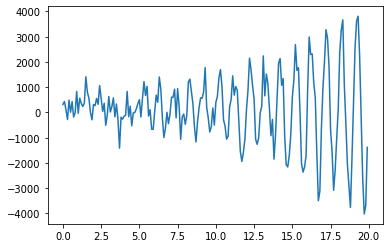

In [0]:
#Question 23:
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/U of I/ATMS 421/Final Exam/data_fit.txt', sep=',')

x = np.array([10,14,2*np.pi,130,.1]) #alpha, beta, eta, gamma, t
def bad_poly(x):
  alpha = x[0]
  beta = x[1]
  eta = x[2]
  gamma = x[3]
  t = x[4]
  y = alpha*np.sin(eta*t)*t**2 + beta*np.cos(eta*t)*t + gamma
  return y

param = (optimize.least_squares(bad_poly, x)) 
print(param)
plt.plot(data['Time'],data['Amplitude'])
#plt.plot(data['Time'],bad_poly(param[x]))

In [0]:
#Question 24:
from scipy import integrate

def lotka(t, z):
  x, y = z
  return [0.55*x - 0.000028*x*y, -0.8*y + 0.000024*x*y]

sol = integrate.solve_ivp(lotka, [1846,1920], [30000,4000])
print(sol.t) #time array
print(sol.y) #population arrays

[1846.         1846.12600361 1847.38603974 1849.08328803 1849.89248249
 1850.76714538 1851.68658246 1852.673484   1853.88928703 1855.90076255
 1857.91223806 1859.57678066 1860.00124893 1860.99676846 1862.02691296
 1863.11262226 1864.21945964 1866.12889064 1868.09771038 1869.83054264
 1870.35554148 1871.32043825 1872.28533501 1873.25023177 1874.25888165
 1875.73252428 1877.57959421 1879.55190747 1881.03695411 1881.80891567
 1882.80289467 1883.79687368 1884.79262578 1886.2302717  1888.07614509
 1890.04819771 1892.02025033 1892.79977281 1893.68956384 1894.82098905
 1895.95241426 1897.8572759  1899.81351878 1901.63531238 1902.15177026
 1903.15085765 1904.14994504 1905.14903242 1906.17674462 1907.76935344
 1909.63624197 1911.34636508 1913.09120142 1913.63006669 1914.53862636
 1915.46974525 1916.46556087 1917.83152952 1919.69856973 1920.        ]
[[30000.         31704.09927738 54473.51059656 80337.29837514
  53525.10900937 22645.42905234 11679.63937358  9239.93181926
  10793.5753228  22368.

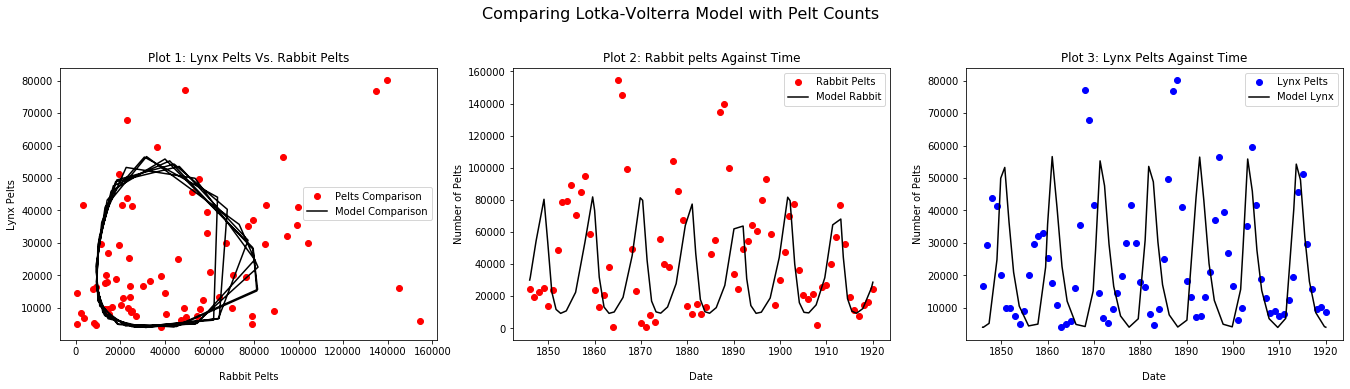

In [0]:
#Question 25:
import matplotlib.pyplot as plt
import pandas as pd
rab_data = pd.read_csv('/content/drive/My Drive/U of I/ATMS 421/Final Exam/rabbits.csv', sep=',')
lynx_data = pd.read_csv('/content/drive/My Drive/U of I/ATMS 421/Final Exam/lynx.csv', sep=',')

from scipy import integrate

def lotka(t, z):
  x, y = z
  return [0.55*x - 0.000028*x*y, -0.8*y + 0.000024*x*y]

sol = integrate.solve_ivp(lotka, [1846,1920], [30000,4000])

fig, axs = plt.subplots(1, 3, figsize=(23,5))
fig.suptitle('Comparing Lotka-Volterra Model with Pelt Counts', x=0.5, y=1.05, fontsize = 16)
fig.subplots_adjust(wspace=0.2)

axs[0].plot(rab_data['PELTS'],lynx_data['PELTS'],'or', label='Pelts Comparison')
axs[0].plot(sol.y[0],sol.y[1],'-k',label='Model Comparison')
axs[0].set_title('Plot 1: Lynx Pelts Vs. Rabbit Pelts')
axs[0].set_ylabel('Lynx Pelts')
axs[0].set_xlabel('Rabbit Pelts')
axs[0].xaxis.labelpad = 15
axs[0].legend()

axs[1].plot(rab_data['DATE'],rab_data['PELTS'],'or', label='Rabbit Pelts')
axs[1].plot(sol.t,sol.y[0],'-k',label='Model Rabbit')
axs[1].set_title('Plot 2: Rabbit pelts Against Time')
axs[1].set_ylabel('Number of Pelts')
axs[1].set_xlabel('Date')
axs[1].xaxis.labelpad = 15
axs[1].legend()

axs[2].plot(lynx_data['DATE'],lynx_data['PELTS'],'ob', label='Lynx Pelts')
axs[2].plot(sol.t,sol.y[1],'-k',label='Model Lynx')
axs[2].set_title('Plot 3: Lynx Pelts Against Time')
axs[2].set_ylabel('Number of Pelts')
axs[2].set_xlabel('Date')
axs[2].xaxis.labelpad = 15
axs[2].legend()

#MY ANSWER TO THE QUESTION: I find that the model best fits the span of years from about 1900 to 1920.  That's where the pelt counts most closely line up with the model
#expectations, based on plots 2 and 3.  Generally, the model is more accurate at lower pelt counts/populations, based on plot 1.

QUESTION 26 (Extra Credit):

Image:

1. It seems that forward Euler integration is used in this paper.  I see that they use (t + delta-t), which is similar to calculating i+1 based off of i. 

2. Considering that it's forward integration, I wouldn't have to make too many edits to my RK4 code to get that to match the model.  However, I would have to manipulate the model to able to take in more paramters, more starting conditions, and produce more results.  In addition, I might have to include code that allows the RK4 estimator to include random values at certain intervals to simulate things like fallout or turbulence.  However, this could perhaps be simulated in the model itself, but the RK4 could be adapted to include randomnization, too.

3. Turbulence is modeled by applying a random "walk" to each particle, determined by a Gaussian random number generator and applied to term Z in the equation.  We could use something like np.random() to model this, and it would be implemented very similarly to our np.random() migrator scheme in the Coho salmon model, I suspect.

4. The ash particles are initialized with information like location (latitude, longitude, height), size, and age.  These traits are determined by the user and there are various parameters that can be changed by the user, such as latitude and longitude, plume height (the individual height is determined randomly, with more optimization by the user), and others.  We could realistically use another gaussian command, like np.random, to determine the height of the particles, and longitude/latitude could be a range giver in parameters.  The number of particles to be initialized is also changed by the user, and is dependent on what kind of scale of data you want versus what kind of computer power you have.

5. The wind in this system works on a grid, where four-dimensional wind movements are collected from other research data and implemented into the model.  At set intervals, like a spatial box model, there are different wind values.  This is true across different heights and latitudes and longitudes.  So I would think that a particle is affected by the winds in each box separately as it flows between them (which is movement modeled by the continuity equation).  We could use a simple function to go between meters and latitude and longitude.  I'm sure there's a conversion ratio available, and it could even be optimized to take the curvature of the earth (and height) into account for a more complicated function.